### <Example 4-2 > 정현파 합성 2
#### A = 16000, fo = 1kHz,  fs = 48kHz, Duration = 1sec

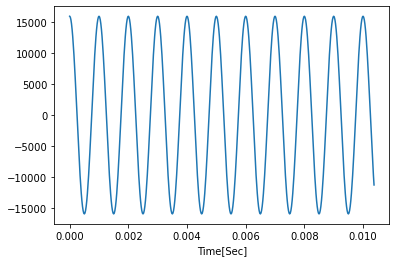

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# cosine wave : x(t) = A cos(2 pi fo t)
fo = 1000
num_samples = 48000 #(1초에 48000개 샘플링함용)
fs = 48000
A = 16000

x = np.zeros(num_samples)

for n in range(num_samples):
    x[n] = A * np.cos(2* np.pi * fo/fs * n)
    
# x = [A * np.cos(2* np.pi * fo/fs * n) for n in range(num_samples)] 도 가능
    
time =np.arange(0.0, 1.0, 1/fs)
plt.plot(time[0:499],x[0:499]), plt.xlabel("Time[Sec]") 
#너무 촘촘해서 500개만 출력.
plt.show()

#x = np.cast['int16'](x)
wavfile.write('test.wav', fs, x)

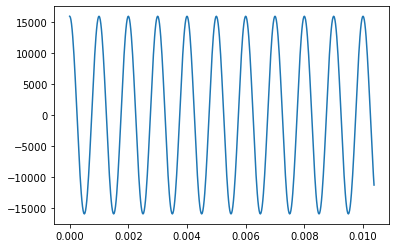

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# cosine wave : y(t) = A * cos(2 * pi * f * t)
frequency = 1000
sampling_rate = 48000
amplitude = 16000

tmin = 0
tmax = 1.0
t = np.linspace(tmin, tmax, sampling_rate) # ( 0~1까지 480000 쪼개기~~) # for문 사용안한거
cosine_wave = amplitude*np.cos(2*np.pi*frequency*t) # signal sampling

plt.plot(t[0:499], cosine_wave[0:499])
plt.show()


### < 실습문제 4-3 >  
아래와 같은 파라미터 값을 가지는 이산 정현파 코사인 신호가 있다. A = 16000, fo = 1kHz,  fs = 48kHz, Duration = 1sec
> (a) 신호를 합성하여 그림을 그리시오.  
> (b) 'consine_1k.wav’라는 파일 이름으로 합성한 정현파를 저장하시오.   
> (c) 'consine_1k.wav’ 소리를 출력하시오.  
> (d) f0를 200, 500, 1000, 5000으로 변경해가면서 파형의 모양과 그 소리를 확인하시오

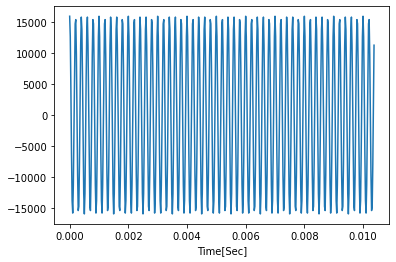

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

fo = 5000
num_samples = 48000 
fs = 48000
A = 16000

x = np.zeros(num_samples)

for n in range(num_samples):
    x[n] = A * np.cos(2* np.pi * fo/fs * n)
    
    
time =np.arange(0.0, 1.0, 1/fs)
plt.plot(time[0:499],x[0:499]), plt.xlabel("Time[Sec]") 
plt.show()

wavfile.write('consine_1k.wav', fs, x)


In [37]:
import pygame
import pygame.mixer
from time import sleep

def Play_sound(filename):
    pygame.mixer.init()
    sound = pygame.mixer.Sound(filename)
    tmp = sound.play()
    while tmp.get_busy():
        pygame.time.delay(1)
        
Play_sound('consine_1k.wav')

error: Unable to open file 'consine_1k.wav'

< 실습문제 4-4 >  
아래와 같은 파라미터 값을 가지는 이산 정현파 코사인 신호가 있다.A = 16000, fo = 1kHz,  fs = 48kHz, 구간 -0.3 – 0.3sec

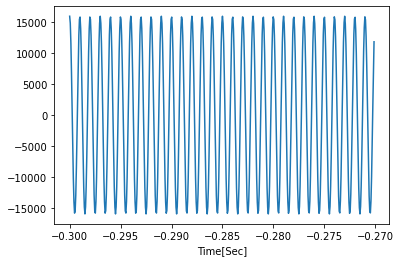

NameError: name 'x' is not defined

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

fo = 1000
num_samples = 10000
fs = 10000
A = 16000

tmin = -0.3
tmax = 0.3
t = np.linspace(tmin, tmax, num_samples)
cosine_wave = A*np.cos(2*np.pi*fo*t)

plt.plot(t[0:499],cosine_wave[0:499]), plt.xlabel("Time[Sec]") 
plt.show()

wavfile.write('cosine_1k.wav', fs, x)
Play_sound('cosine_1k.wav') 

> A1 =1000, sine wave f01 = 1kHz  
> A2 = 500, cosine wave 02 = 500Hz  
> fs =10 kHz, 구간 : -0.3 ~ 0.3 sec 

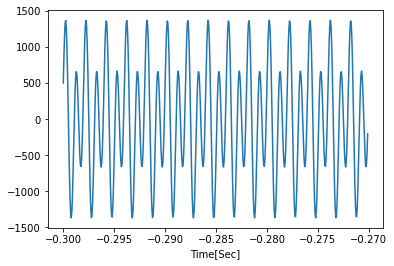

In [8]:
f01 = 1000
f02 = 500
A1 = 1000
A2 = 500
fs = 10000

tmin = -0.3
tmax = 0.3

t = np.linspace(tmin, tmax, fs)

s = A1 * np.sin(2*np.pi*f01*t) + A2 * np.cos(2*np.pi*f02*t)
plt.plot(t[:499],s[:499]), plt.xlabel('Time[Sec]')
plt.show()

> x(t) = 10*cos(100*pi x t) + 2sin(200*pi x t) + cos(500*pi x t)  
>fs =1kHz, 구간 -0.3~0.3 sec

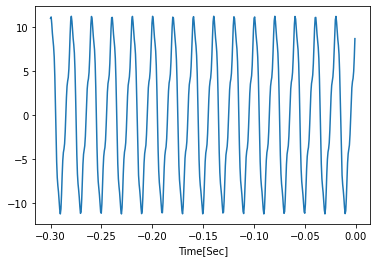

In [17]:
f01 = 50
f02 = 100
f03 = 250

A1 = 10
A2 = 2
A3 = 1

fs = 1000

tmin = -0.3
tmax = 0.3

t = np.linspace(tmin, tmax, fs)

s = A1 * np.cos(2*np.pi*f01*t) + A2 * np.sin(2*np.pi*f02*t) + A3 * np.cos(2*np.pi*f03*t)
plt.plot(t[:499],s[:499]), plt.xlabel('Time[Sec]')
plt.show()

A = 1, f0 = 40Hz, Duration = -0.05 ~ 0.05 sec  
> (a)아래의 def sinusoidal_signal (ti, tf, fsm, fs, A, f0 , rs, cs, r) 함수를 완성하시오.  
> (b) fsm = 1000 으로 하여 해당하는 정현파를 연속신호라 가정하자. 정현파를 그리시오.  
> (c) fs = 40, 60, 80, 400일 때 각각 해당하는 정현파를 .(b)신호와 중첩해서 그리시오.  
stem()함수를 사용하시오. 

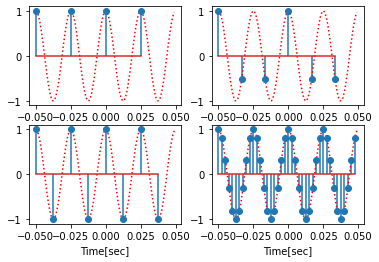

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#rs, cs, r - subplot 인자.
def sinusoidal_signal(ti, tf, fsm, fs, A, f0, rs, cs, r):
    # 원본 신호
    t = np.arange(ti,tf,1/fsm)
    xc = A * np.cos(2*np.pi*f0*t)
    
    n = np.arange(ti,tf, 1/fs)
    xd = A * np.cos(2*np.pi*f0*n)
    
    plt.subplot(rs,cs,r)
    plt.plot(t, xc, ':r')
    plt.stem(n, xd), plt.xlabel('Time[sec]') # 중첩해서 그리기


f0 = 40

#Duration
ti = -0.05
tf = 0.05

fsm = 1000 # 원본 신호
fs = [40, 60, 80, 400]


sinusoidal_signal(ti, tf, fsm, fs[0], 1, f0, 2, 2, 1)
sinusoidal_signal(ti, tf, fsm, fs[1], 1, f0, 2, 2, 2)
sinusoidal_signal(ti, tf, fsm, fs[2], 1, f0, 2, 2, 3)
sinusoidal_signal(ti, tf, fsm, fs[3], 1, f0, 2, 2, 4)

plt.show()

#fs =80이어도 표현 헀다. sampling frequncy 80ㅂ터 가능한 

x(t) = 10*cos(100*pi x t) + 20 sin(200*pi x t) + cos(500*pi x t)  
Duration = -0.05 ~ 0.05 sec  
(최대주파수 : 250)    
> (a) fsm = 1000 으로 하여 해당하는 정현파를 연속신호라 가정하자. 정현파를 그리시오.  
> (b) fs = 200,400,500,800일 때 각각 해당하는 정현파를 .(a)신호와 중첩해서 그리시오.  
stem()함수를 사용하시오. 

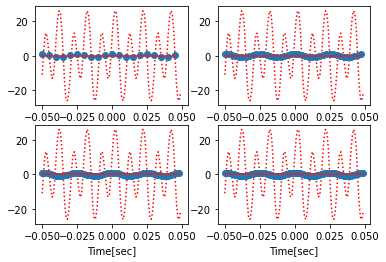

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#rs, cs, r - subplot 인자.
def sinusoidal_signal(ti, tf, fsm, fs, A, f0, rs, cs, r):
    # 원본 신호
    t = np.arange(ti,tf,1/fsm)
    xc = 10* np.cos(2*np.pi*50*t) + 20 * np.sin(2*np.pi*100*t) + np.cos(2*np.pi*250*t)
    
    n = np.arange(ti,tf, 1/fs)
    xd = A * np.cos(2*np.pi*f0*n)
    
    plt.subplot(rs,cs,r)
    plt.plot(t, xc, ':r')
    plt.stem(n, xd), plt.xlabel('Time[sec]') # 중첩해서 그리기


f0 = 40

#Duration
ti = -0.05
tf = 0.05

fsm = 1000 # 원본 신호
fs = [200,400,500,800]

for i in range(4):
    sinusoidal_signal(ti, tf, fsm, fs[i], 1, f0, 2, 2, i+1)

plt.show()